### BUILDING AN APPLICATION PROGRAMMING INTERFACE FOR CREDIT CARD APPROVALS

In the last few years, there have been some changes in trends involving the data science community. The deployment and productionalization of machine learning models have been the hardest to ignore. This change has increased the pressure on Data Science teams to deliver software engineering along with machine learning solutions. 

The purpose of this project is to build an API using a machine learning model trained with credit card application data collected from the UCI Machine Learning website. The API is to make the rather error prone, tedious and mundane task of going through each application one by one an easier one. 

The bank or the financial institution in question 

### Exploratory Data Analysis

In [1]:
#Not comfortable with warnings, so lets silence them.
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the pandas library
import pandas as pd
import numpy as np

In [3]:
credit_data = pd.read_csv('credit_data.csv') # Loading the data into a dataframe called credit_data

In [4]:
#Viewing the first 5 rows of the data
credit_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [5]:
credit_data.tail(20)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
670,b,47.17,5.835,u,g,w,v,5.500,f,f,0,f,g,00465,150,-
671,b,25.83,12.835,u,g,cc,v,0.500,f,f,0,f,g,00000,2,-
672,a,50.25,0.835,u,g,aa,v,0.500,f,f,0,t,g,00240,117,-
673,?,29.50,2.000,y,p,e,h,2.000,f,f,0,f,g,00256,17,-
674,a,37.33,2.500,u,g,i,h,0.210,f,f,0,f,g,00260,246,-
675,a,41.58,1.040,u,g,aa,v,0.665,f,f,0,f,g,00240,237,-
676,a,30.58,10.665,u,g,q,h,0.085,f,t,12,t,g,00129,3,-
677,b,19.42,7.250,u,g,m,v,0.040,f,t,1,f,g,00100,1,-
678,a,17.92,10.210,u,g,ff,ff,0.000,f,f,0,f,g,00000,50,-
679,a,20.08,1.250,u,g,c,v,0.000,f,f,0,f,g,00000,0,-


In [6]:
credit_data.isnull().sum() #Investigating missing values in the data set

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [7]:
#Miising values are represented with '?' in the dataset
cols_with_que_marks = []
for col in credit_data:
    if '?' in credit_data[col].values:
        cols_with_que_marks.append(col)
print('Columns with "?" as missing values:\n{}'.format(cols_with_que_marks)) #Print all cols in the dataset with '?' as missing values

Columns with "?" as missing values:
['Male', 'Age', 'Married', 'BankCustomer', 'EducationLevel', 'Ethnicity', 'ZipCode']


In [8]:
#Replacing '?' with NaNs.
for col in cols_with_que_marks:
    credit_data[col] = credit_data[col].replace('?', np.nan)

In [9]:
credit_data.isnull().sum() # Checking null values again

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
ApprovalStatus     0
dtype: int64

In [10]:
type(credit_data)

pandas.core.frame.DataFrame

In [11]:
#Replacing missing values
#If the column is of the string type replace missing values with the most occuring value, else replace with the mean
for col in credit_data:
    # Check if the column is of object type
    if credit_data[col].dtypes == 'object':
        # Impute with the most frequent value
        credit_data = credit_data.fillna(credit_data[col].value_counts().index[0])
    else:
        credit_data = credit_data.fillna(credit_data.mean())
    
# Count the number of NaNs in the credit_dataset and print the counts to verify
print(credit_data.isnull().values.sum())

0


In [12]:
#Lets verify to be sure the dataframe has no missing values
credit_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [13]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               690 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [14]:
for col in credit_data:
    unique_values = credit_data[col].unique()
    print(unique_values)

['b' 'a']
['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' 'b' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25' '56.50' '43.

In [15]:
#There is a 'b' hiding in the age column, lets get rid of it.
age_list = credit_data.Age.values.tolist()
'b' in age_list

True

In [16]:
credit_data['Age'] = credit_data['Age'].replace('b', np.nan)

In [17]:
credit_data.isnull().sum()

Male               0
Age               12
Debt               0
Married            0
BankCustomer       0
EducationLevel     0
Ethnicity          0
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode            0
Income             0
ApprovalStatus     0
dtype: int64

In [18]:
display(credit_data.head())
print('*' * 50)
display(credit_data.info())

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null object
Age               678 non-null object
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null object
Employed          690 non-null object
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null object
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


None

In [19]:
check = credit_data['Age'].str == 'b'

In [20]:
check

False

In [21]:
#replacing the unwanted 'b' with nan
age_list = credit_data.Age.values.tolist()

In [22]:
#lets convert the type of the age column to float
credit_data['Age'] = credit_data['Age'].astype('float')

In [23]:
#replacing the missing values in the age column with the mean age
mean_age = credit_data['Age'].mean()
mean_age
credit_data['Age'] = credit_data['Age'].fillna(mean_age)

In [24]:
credit_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
ApprovalStatus    0
dtype: int64

In [25]:
#remapping the male column as {'a':1, 'b':0}
male_map = {'a': 1, 'b': 0}
credit_data['Male'] = credit_data['Male'].map(male_map)

In [26]:
#remapping the PriorDefault as {'t':1, 'f' : 0}
default_map = {'t' : 1, 'f' : 0}
credit_data['PriorDefault'] = credit_data['PriorDefault'].map(default_map)

In [27]:
#remapping Employed as{'t':1, 'f':0}
employ_map = {'t' : 1, 'f' : 0}
credit_data['Employed'] = credit_data['Employed'].map(employ_map)

In [28]:
#remapping approv_map as {'+' : 1, '-' : 0}
approv_map = {'+' : 1, '-' : 0}
credit_data['ApprovalStatus'] = credit_data['ApprovalStatus'].map(approv_map)

In [29]:
credit_data.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,0,30.83,0.000,u,g,w,v,1.25,1,1,1,f,g,00202,0,1
1,1,58.67,4.460,u,g,q,h,3.04,1,1,6,f,g,00043,560,1
2,1,24.50,0.500,u,g,q,h,1.50,1,0,0,f,g,00280,824,1
3,0,27.83,1.540,u,g,w,v,3.75,1,1,5,t,g,00100,3,1
4,0,20.17,5.625,u,g,w,v,1.71,1,0,0,f,s,00120,0,1


In [30]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null int64
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null object
BankCustomer      690 non-null object
EducationLevel    690 non-null object
Ethnicity         690 non-null object
YearsEmployed     690 non-null float64
PriorDefault      690 non-null int64
Employed          690 non-null int64
CreditScore       690 non-null int64
DriversLicense    690 non-null object
Citizen           690 non-null object
ZipCode           690 non-null object
Income            690 non-null int64
ApprovalStatus    690 non-null int64
dtypes: float64(3), int64(6), object(7)
memory usage: 86.4+ KB


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [32]:
%matplotlib inline

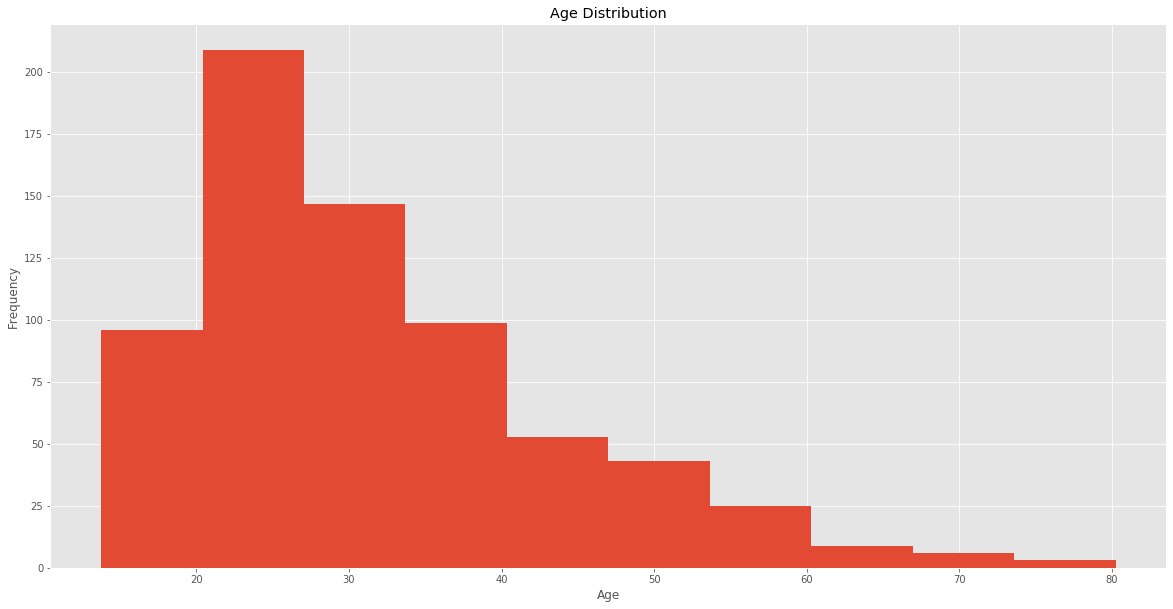

In [33]:
plt.figure(figsize=(20,10))
plt.hist(credit_data['Age'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.savefig('visualizations/age_dsitribution.jpg')
plt.show()

In [34]:
male = credit_data.groupby('Male')['Age'].count()
male

Male
0    480
1    210
Name: Age, dtype: int64

480 females 210 males applied for credit cards according to the data set

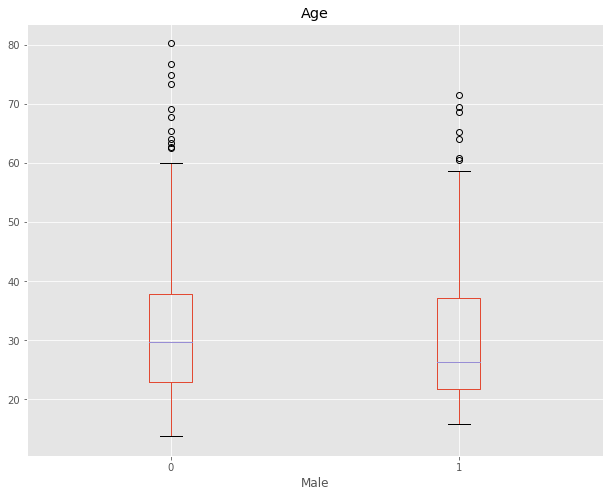

In [35]:
fig, ax = plt.subplots(figsize=(10,8))
credit_data.boxplot(column = 'Age', by = 'Male', ax = ax)
plt.suptitle('')
plt.savefig('visualizations/age_of_male_female.jpg')
plt.show()

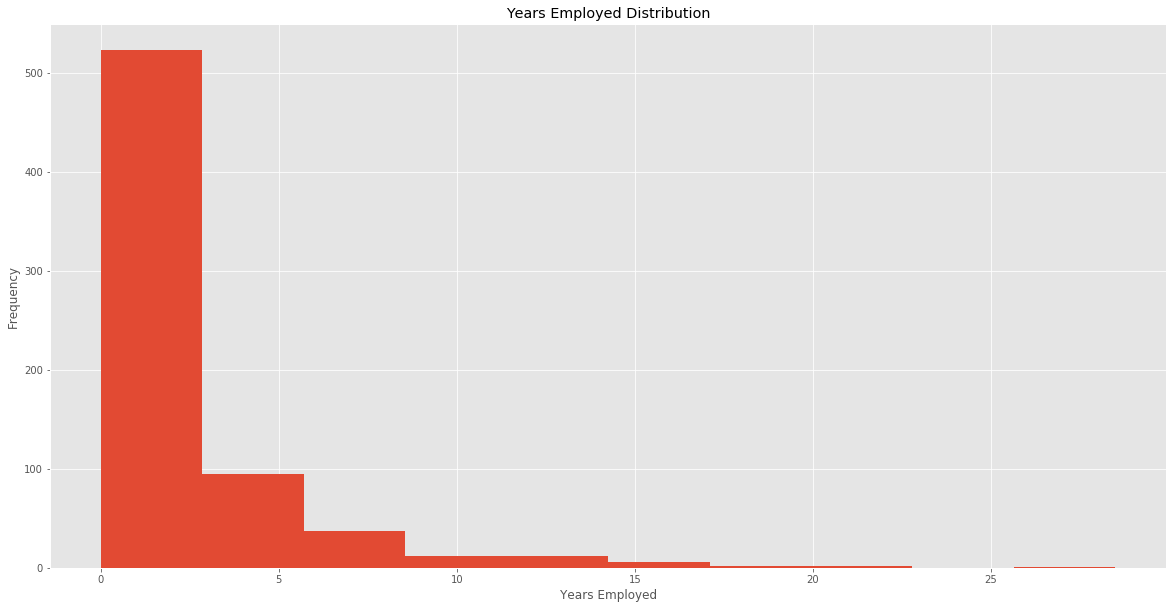

In [36]:
plt.figure(figsize=(20,10))
plt.hist(credit_data['YearsEmployed'])
plt.xlabel('Years Employed')
plt.ylabel('Frequency')
plt.title('Years Employed Distribution')
plt.savefig('visualizations/years_employed.jpg')
plt.show()

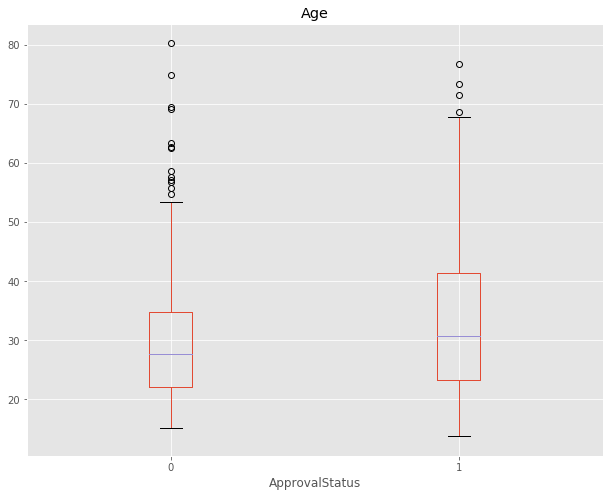

In [37]:
fig, ax = plt.subplots(figsize=(10,8))
credit_data.boxplot(column = 'Age', by = 'ApprovalStatus', ax = ax)
plt.suptitle('')
plt.savefig('visualizations/approval_status_male_female.jpg')
plt.show()

<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>
<p>First, we will be converting all the non-numeric values into numeric ones. We do this because not only it results in a faster computation but also many machine learning models (like XGBoost) (and especially the ones developed using scikit-learn) require the data to be in a strictly numeric format. We will do this by using a technique called <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">label encoding</a>.</p>

In [38]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in credit_data.columns:
    # Compare if the dtype is object
    if credit_data[col].dtypes=='object':
    # Use LabelEncoder to do the numeric transformation
        credit_data[col]=le.fit_transform(credit_data[col])
        
# As we can see all features are of numeric type now
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
Male              690 non-null int64
Age               690 non-null float64
Debt              690 non-null float64
Married           690 non-null int64
BankCustomer      690 non-null int64
EducationLevel    690 non-null int64
Ethnicity         690 non-null int64
YearsEmployed     690 non-null float64
PriorDefault      690 non-null int64
Employed          690 non-null int64
CreditScore       690 non-null int64
DriversLicense    690 non-null int64
Citizen           690 non-null int64
ZipCode           690 non-null int64
Income            690 non-null int64
ApprovalStatus    690 non-null int64
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


 ### plitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing. Ideally, no information from the test data should be used to scale the training data or should be used to direct the training process of a machine learning model. Hence, we first split the data and then apply the scaling.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features. In Data Science literature, this is often referred to as <em>feature selection</em>. </p>

In [39]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Drop the features 11 and 13 and convert the DataFrame to a NumPy array
credit_data = credit_data.drop([credit_data.columns[11], credit_data.columns[13]], axis=1)
credit_data = credit_data.values

# Segregate features and labels into separate variables
X,y = credit_data[:,0:13] , credit_data[:,13]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

In [40]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler and use it to rescale X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.fit_transform(X_test)

In [41]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression()

# Fit logreg to the train set
logreg.fit(rescaledX_train, y_train)

LogisticRegression()

In [42]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Use logreg to predict instances from the test set and store it
y_pred = logreg.predict(rescaledX_test)

# Get the accuracy score of logreg model and print it
print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test, y_test))

# Print the confusion matrix of the logreg model
confusion_matrix(y_pred, y_test)

Accuracy of logistic regression classifier:  0.8377192982456141


array([[99, 11],
       [26, 92]])

 ## Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of almost 84%.</p>
<p>For the confusion matrix, the first element of the of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a <a href="https://machinelearningmastery.com/how-to-tune-algorithm-parameters-with-scikit-learn/">grid search</a> of the model parameters to improve the model's ability to predict credit card approvals.</p>
<p><a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html">scikit-learn's implementation of logistic regression</a> consists of different hyperparameters but we will grid search over the following two:</p>
<ul>
<li>tol</li>
<li>max_iter</li>
</ul>

In [43]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)
print(param_grid)

{'tol': [0.01, 0.001, 0.0001], 'max_iter': [100, 150, 200]}


 ## Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a <a href="https://www.dataschool.io/machine-learning-with-scikit-learn/">cross-validation</a> of five folds.</p>
<p>We'll end the notebook by storing the best-achieved score and the respective best parameters.</p>
<p>While building this credit card predictor, we tackled some of the most widely-known preprocessing steps such as <strong>scaling</strong>, <strong>label encoding</strong>, and <strong>missing value imputation</strong>. We finished with some <strong>machine learning</strong> to predict if a person's application for a credit card would get approved or not given some information about that person.</p>

In [44]:
# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Use scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

# Fit data to grid_model
grid_model_result = grid_model.fit(rescaledX, y)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}
